# Compare Mean Fluorescence Intensity of Gated Events

In [ ]:
import os
import pandas as pd

import flowkit as fk

%matplotlib inline

## Load FlowJo Workspace

In [ ]:
base_dir = "../../../data/8_color_data_set"

sample_path = os.path.join(base_dir, "fcs_files")
wsp_path = os.path.join(base_dir, "8_color_ICS.wsp")

In [ ]:
fks_fj = fk.Session(sample_path)
fks_fj.import_flowjo_workspace(wsp_path)

In [ ]:
fks_fj.get_sample_ids()

In [ ]:
fks_fj.get_sample_groups()

## Record our sample ID and sample group for later

In [ ]:
sample_id = '101_DEN084Y5_15_E03_009_clean.fcs'
sample_grp = 'DEN'

In [ ]:
sample = fks_fj.get_sample(sample_id)

In [ ]:
sample.channels

## Review the gate hierachy

In [ ]:
print(fks_fj.get_gate_hierarchy(sample_grp, 'ascii'))

## Process gates for the sample group

In [ ]:
fks_fj.analyze_samples(sample_grp)

In [ ]:
results = fks_fj.get_gating_results(sample_grp, sample_id)

In [ ]:
results.report

## Get gated events for a sample

In [ ]:
# first get a compensation matrix and transform to use for gated events
comps = fks_fj.get_sample_comp_matrices(sample_grp, sample_id)
xforms = fks_fj.get_sample_transforms(sample_grp, sample_id)

In [ ]:
comps, xforms

In [ ]:
comp = comps[0]
xform = xforms[6]

In [ ]:
cd4_gate_name = 'CD4+'
cd4_events = fks_fj.get_gate_events(sample_grp, sample_id, cd4_gate_name, matrix=comp, transform=xform)

In [ ]:
sample.event_count, len(cd4_events)

In [ ]:
cd4_events

## Calculate means for channels of interest

In [ ]:
cd4_mfi = cd4_events.mean()

In [ ]:
cd4_mfi = cd4_mfi[sample.fluoro_indices]

In [ ]:
cd4_mfi

### Let's compare MFI between CD4+ & CD8+

In [21]:
cd4_mfi

pnn                   pns
TNFa FITC FLR-A              0.248338
CD8 PerCP-Cy55 FLR-A         0.274010
IL2 BV421 FLR-A              0.288348
Aqua Amine FLR-A             0.250962
IFNg APC FLR-A               0.246429
CD3 APC-H7 FLR-A             0.488177
CD107a PE FLR-A              0.279935
CD4 PE-Cy7 FLR-A             0.588879
dtype: float64

### Let's compare MFI between CD4+ & CD8+

In [22]:
cd8_gate_name = 'CD8+'
cd8_events = fks_fj.get_gate_events(sample_grp, sample_id, cd8_gate_name, matrix=comp, transform=xform)
cd8_mfi = cd8_events.mean()[sample.fluoro_indices]

In [23]:
mfi_comp = pd.DataFrame([cd4_mfi, cd8_mfi], index=[cd4_gate_name, cd8_gate_name])

In [24]:
mfi_comp

pnn,TNFa FITC FLR-A,CD8 PerCP-Cy55 FLR-A,IL2 BV421 FLR-A,Aqua Amine FLR-A,IFNg APC FLR-A,CD3 APC-H7 FLR-A,CD107a PE FLR-A,CD4 PE-Cy7 FLR-A
pns,,,,,,,,
CD4+,0.248338,0.274010,0.288348,0.250962,0.246429,0.488177,0.279935,0.588879
CD8+,0.250975,0.584248,0.283504,0.251208,0.252061,0.459689,0.292997,0.308986


In [25]:
mfi_comp = mfi_comp.transpose().droplevel('pns').reset_index()

In [26]:
mfi_comp

,pnn,CD4+,CD8+
0,TNFa FITC FLR-A,0.248338,0.250975
1,CD8 PerCP-Cy55 FLR-A,0.274010,0.584248
2,IL2 BV421 FLR-A,0.288348,0.283504
3,Aqua Amine FLR-A,0.250962,0.251208
4,IFNg APC FLR-A,0.246429,0.252061
5,CD3 APC-H7 FLR-A,0.488177,0.459689
6,CD107a PE FLR-A,0.279935,0.292997
7,CD4 PE-Cy7 FLR-A,0.588879,0.308986


[]

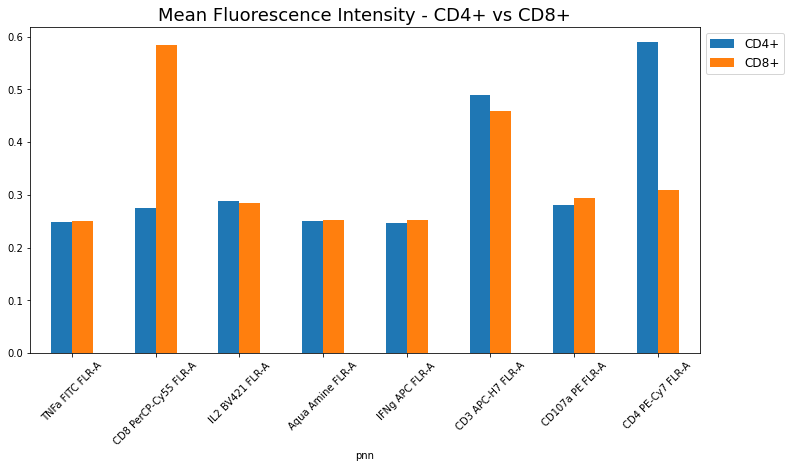

In [27]:
ax = mfi_comp.plot.bar(x='pnn', figsize=(12, 6))
ax.set_title("Mean Fluorescence Intensity - CD4+ vs CD8+", color='black', fontsize=18)
ax.legend(bbox_to_anchor=(1.0, 1.0), fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.plot()